# Credit Risk Analysis & Default Risk Insights

## Objective
*Analyze borrower loan data to identify patterns associated with loan default risk using Python-based exploratory data analysis and visualization.*


## Data Overview
Initial inspection was performed to understand dataset size, structure, and data quality before analysis.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving loan_data_2007_2014.csv to loan_data_2007_2014.csv


In [3]:
import pandas as pd

df=pd.read_csv('loan_data_2007_2014.csv')

/tmp/ipython-input-1992064072.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('loan_data_2007_2014.csv')


In [4]:
df.head()


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape


(466285, 75)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [7]:
df['loan_status'].value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


## Defining Default
Loans were classified as default or non-default based on loan_status values. Only loans with known outcomes were included.


In [8]:
good_status=['Fully Paid','Does not meet the credit policy. Status:Fully Paid']
bad_status=['Charged Off','Default','Late (31-120 days)','Does not meet the credit policy. Status:Charged Off']

df_filtered = df[df['loan_status'].isin(good_status + bad_status)].copy()

In [9]:
df_filtered['default_flag'] = df_filtered['loan_status'].apply(
    lambda x: 1 if x in bad_status else 0
    )

In [10]:
df_filtered.shape
df_filtered['default_flag'].value_counts()

,count
default_flag,
0,186727
1,50968


In [11]:
df_filtered['income_group'] = pd.qcut(
    df_filtered['annual_inc'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High']
)

In [15]:
df_filtered.groupby('income_group')['default_flag'].mean()

/tmp/ipython-input-1294399619.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby('income_group')['default_flag'].mean()


,default_flag
income_group,
Low,0.261297
Medium,0.230030
High,0.198449
Very High,0.165077


/tmp/ipython-input-4024167508.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby('income_group')['default_flag'].mean().plot(


<Axes: title={'center': 'Default Rate by Income Group'}, xlabel='Income Group', ylabel='Default Rate'>

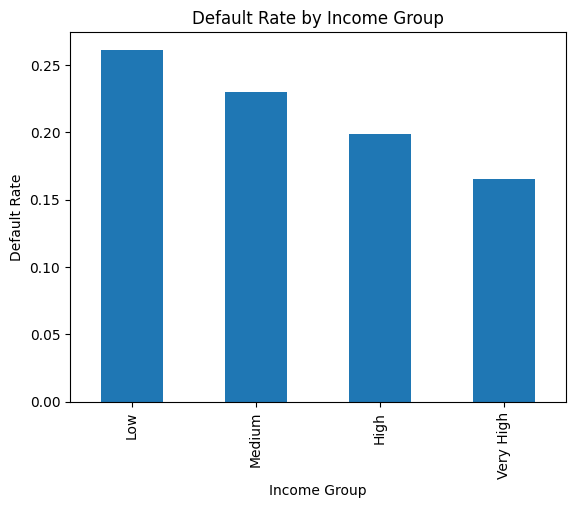

In [16]:
df_filtered.groupby('income_group')['default_flag'].mean().plot(
    kind='bar',
    title='Default Rate by Income Group',
    ylabel='Default Rate',
    xlabel='Income Group'
)

Borrowers in lower income groups show consistently higher default rates, indicating income as a key indicator of repayment capacity.


> Income default range: ~16% → ~26% (10% spread)



In [17]:
df_filtered['int_rate'].head()

,int_rate
0,10.65
1,15.27
2,15.96
3,13.49
5,7.90


In [18]:
df_filtered['int_rat_group']=pd.qcut(
    df_filtered['int_rate'],
    q=4,
    labels=['Low','Medium','High','Very High']
)

In [21]:
df_filtered.groupby('int_rat_group')['default_flag'].mean()

/tmp/ipython-input-1242783681.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby('int_rat_group')['default_flag'].mean()


,default_flag
int_rat_group,
Low,0.096020
Medium,0.171088
High,0.242587
Very High,0.357607


/tmp/ipython-input-500541725.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby('int_rat_group')['default_flag'].mean().plot(


<Axes: title={'center': 'Default Rate by Interest Rate Group'}, xlabel='Interest Rate Group', ylabel='Default Rate'>

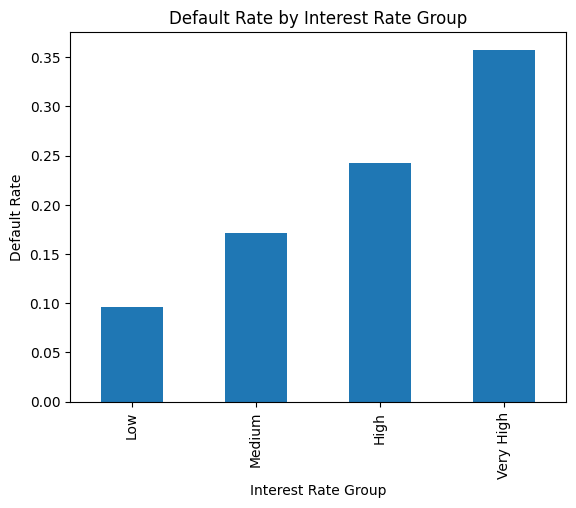

In [22]:
df_filtered.groupby('int_rat_group')['default_flag'].mean().plot(
    kind='bar',
    title='Default Rate by Interest Rate Group',
    ylabel='Default Rate',
    xlabel='Interest Rate Group'
)

Borrowers in lower interest groups show consistently higher default rates, indicating Interest Rate as a key indicator of repayment capacity.


> Interest rate default range: ~10% → ~36% (26% spread)




In [23]:
df_filtered['purpose'].value_counts().head(10)

,count
purpose,
debt_consolidation,138318
credit_card,47421
home_improvement,13824
other,13635
major_purchase,5951
small_business,4766
car,3498
medical,2706
wedding,2017


In [24]:
purpose_default = df_filtered.groupby('purpose')['default_flag'].mean().sort_values(ascending=False)
purpose_default


,default_flag
purpose,
small_business,0.317457
moving,0.241543
other,0.239751
medical,0.227642
debt_consolidation,0.224620
renewable_energy,0.210938
educational,0.208531
house,0.207436
vacation,0.201236


<Axes: title={'center': 'Default Rate by Loan Purpose (Top 10)'}, xlabel='Loan Purpose', ylabel='Default Rate'>

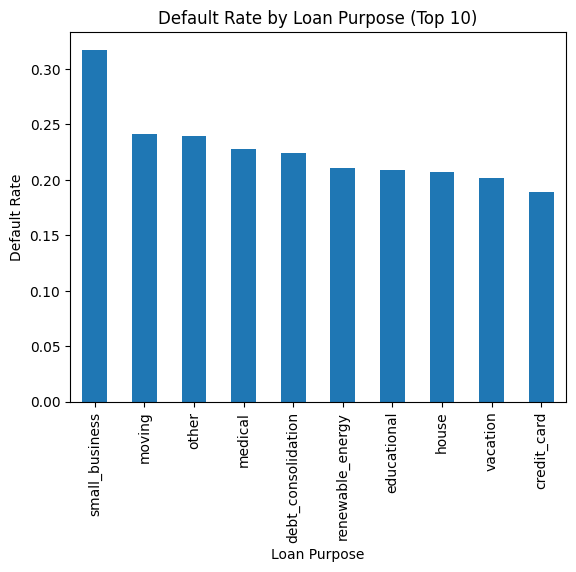

In [25]:
purpose_default.head(10).plot(
    kind='bar',
    title='Default Rate by Loan Purpose (Top 10)',
    ylabel='Default Rate',
    xlabel='Loan Purpose'
)


Borrowers in Small business,moving, other and medical groups show consistently higher default rates, indicating Loan Purpose as a key indicator of repayment capacity.


> Loan Purpose default range: ~21% → ~32% (11% spread)




# Default risk increases when:


1.   Default risk decreases as borrower income increases.
2.   Higher interest rates are strongly associated with higher default rates.
3.   Small business loans exhibit the highest default risk among loan purposes.



> *Exploratory credit risk analysis revealed that default risk is significantly higher among low-income borrowers, loans with higher interest rates, and business-related loan purposes. Small business loans exhibited the highest default rates, while consumer credit card loans showed comparatively lower risk. These findings highlight the importance of borrower segmentation in credit decision-making.*







